In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ax
import matplotlib
import matplotlib.dates as mdates
import datetime

In [2]:
df = pd.read_csv("states_proportions_all_3.csv")
df.head()

,day,direction,protocol,state,connections
0,2015-01-01 00:00:00,inbound,icmp,OTH,7913317
1,2015-01-01 00:00:00,inbound,tcp,OTH,662306
2,2015-01-01 00:00:00,inbound,tcp,REJ,1726083
3,2015-01-01 00:00:00,inbound,tcp,RSTO,1095348
4,2015-01-01 00:00:00,inbound,tcp,RSTOS0,263346


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146861 entries, 0 to 146860
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   day          146861 non-null  object
 1   direction    146861 non-null  object
 2   protocol     146851 non-null  object
 3   state        146833 non-null  object
 4   connections  146861 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 5.6+ MB


In [4]:
df.describe()

,connections
count,1.468610e+05
mean,1.721547e+07
std,1.266665e+08
min,0.000000e+00
25%,3.498300e+04
50%,5.967350e+05
75%,4.600066e+06
max,4.126505e+09


In [5]:
df_pivot = df.pivot_table('connections', ['day', 'direction', 'protocol'], 'state', fill_value = 0)
df_pivot

state                                   #separator       OTH      REJ  \
day                 direction protocol                                  
2015-01-01 00:00:00 inbound   icmp               0   7913317        0   
                              tcp                0    662306  1726083   
                              udp                0    232428        0   
                    internal  icmp               0     85852        0   
                              tcp                0        27        0   
...                                            ...       ...      ...   
2023-03-31 00:00:00 internal  tcp                0    468132        3   
                              udp                0       123        0   
                    outbound  icmp               0  72620651        0   
                              tcp                0  42148143    12575   
                              udp                0   9351387        0   

state                                      RSTO    RSTOS0     RSTR     RSTRH  \
day                 direction protocol                                         
2015-01-01 00:00:00 inbound   icmp            0         0        0         0   
                              tcp       1095348    263346   668573    328192   
                              udp             0         0        0         0   
                    internal  icmp            0         0        0         0   
                              tcp             0       622        0       973   
...                                         ...       ...      ...       ...   
2023-03-31 00:00:00 internal  tcp         11038     27167     7077      5274   
                              udp             0         0        0         0   
                    outbound  icmp            0         0        0         0   
                              tcp       6159974  72956295  3039630  21218197   
                              udp             0         0        0         0   

state                                           S0       S1       S2       S3  \
day                 direction protocol                                          
2015-01-01 00:00:00 inbound   icmp               0        0        0        0   
                              tcp         23919424   434820     9600    47001   
                              udp         10289522        0        0        0   
                    internal  icmp               0        0        0        0   
                              tcp              273        0        0        0   
...                                            ...      ...      ...      ...   
2023-03-31 00:00:00 internal  tcp           482571     4838     3993     2452   
                              udp           487602        0        0        0   
                    outbound  icmp               0        0        0        0   
                              tcp        101714278  6695484  2777269  2818340   
                              udp       2411676553        0        0        0   

state                                         SF        SH       SHR  \x09  
day                 direction protocol                                      
2015-01-01 00:00:00 inbound   icmp             0         0         0     0  
                              tcp        9898240    201334     57379     0  
                              udp       20516895         0    260355     0  
                    internal  icmp             0         0         0     0  
                              tcp              0       258      1819     0  
...                                          ...       ...       ...   ...  
2023-03-31 00:00:00 internal  tcp         177179    158535     41533     0  
                              udp            464         0    114530     0  
                    outbound  icmp             0         0         0     0  
                              tcp       29867360  16527119  38805993     0  
                              u

In [6]:
df_pivot.reset_index(drop = False, inplace = True)
df_pivot.reindex(['day', 'direction', 'protocol', 'OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH', 'SHR'], axis=1)

state,day,direction,protocol,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,2015-01-01 00:00:00,inbound,icmp,7913317,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 00:00:00,inbound,tcp,662306,1726083,1095348,263346,668573,328192,23919424,434820,9600,47001,9898240,201334,57379
2,2015-01-01 00:00:00,inbound,udp,232428,0,0,0,0,0,10289522,0,0,0,20516895,0,260355
3,2015-01-01 00:00:00,internal,icmp,85852,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 00:00:00,internal,tcp,27,0,0,622,0,973,273,0,0,0,0,258,1819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25672,2023-03-31 00:00:00,internal,tcp,468132,3,11038,27167,7077,5274,482571,4838,3993,2452,177179,158535,41533
25673,2023-03-31 00:00:00,internal,udp,123,0,0,0,0,0,487602,0,0,0,464,0,114530
25674,2023-03-31 00:00:00,outbound,icmp,72620651,0,0,0,0,0,0,0,0,0,0,0,0
25675,2023-03-31 00:00:00,outbound,tcp,42148143,12575,6159974,72956295,3039630,21218197,101714278,6695484,2777269,2818340,29867360,16527119,38805993


In [7]:
inb_tcp = df_pivot.loc[df_pivot['direction'] == 'inbound'].loc[df_pivot['protocol'] == 'tcp']
out_tcp = df_pivot.loc[df_pivot['direction'] == 'outbound'].loc[df_pivot['protocol'] == 'tcp']
int_tcp = df_pivot.loc[df_pivot['direction'] == 'internal'].loc[df_pivot['protocol'] == 'tcp']
inb_udp = df_pivot.loc[df_pivot['direction'] == 'inbound'].loc[df_pivot['protocol'] == 'udp']
out_udp = df_pivot.loc[df_pivot['direction'] == 'outbound'].loc[df_pivot['protocol'] == 'udp']
int_udp = df_pivot.loc[df_pivot['direction'] == 'internal'].loc[df_pivot['protocol'] == 'udp']
out_tcp
# max_tcp_inb = df.loc[df['direction'] == 'inbound'].loc[df['protocol'] == 'tcp']['connections'].max()
# max_tcp_out = df.loc[df['direction'] == 'outbound'].loc[df['protocol'] == 'tcp']['connections'].max()
# max_udp_inb = df.loc[df['direction'] == 'inbound'].loc[df['protocol'] == 'udp']['connections'].max()
# max_udp_out = df.loc[df['direction'] == 'outbound'].loc[df['protocol'] == 'udp']['connections'].max()
# max_tcp_int = df.loc[df['direction'] == 'internal'].loc[df['protocol'] == 'tcp']['connections'].max()
# max_udp_int = df.loc[df['direction'] == 'internal'].loc[df['protocol'] == 'udp']['connections'].max()

state,day,direction,protocol,#separator,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR,\x09
7,2015-01-01 00:00:00,outbound,tcp,0,1415983,2154894,6814300,143280,4309114,253562,5975767,144841,16305,221497,10936871,363424,145940,0
16,2015-01-02 00:00:00,outbound,tcp,0,1773673,1599619,10715217,132039,4052893,152235,5812591,289584,21327,537005,19349192,380137,291001,0
25,2015-01-03 00:00:00,outbound,tcp,0,1865261,1438657,12926035,151741,4267352,173567,5606064,202238,21875,310360,14101241,418169,221161,0
34,2015-01-04 00:00:00,outbound,tcp,0,2546007,2004319,5533514,151258,6503683,147147,6928995,194647,19484,319019,13618211,415565,283089,0
43,2015-01-05 00:00:00,outbound,tcp,0,2129257,2088464,5530627,209601,4937349,660298,8425579,611173,32083,1072044,35517886,600970,761006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25639,2023-03-27 00:00:00,outbound,tcp,0,42485018,11499,5857340,71357925,2751292,20312287,102923126,6544057,2514856,2483712,30321916,16900277,38802845,0
25648,2023-03-28 00:00:00,outbound,tcp,0,46290496,12723,5510029,66155870,2728514,19331287,95622827,6296350,2421514,2406849,28049026,15197982,36012250,0
25657,2023-03-29 00:00:00,outbound,tcp,0,42770933,12991,5772655,68112423,2844115,20696281,97791697,6644143,2635865,2612341,28629544,16332639,37632445,0
25666,2023-03-30 00:00:00,outbound,tcp,0,41418428,19474,5343588,64047472,2758740,18688820,91980724,6214785,2314914,2390829,27481894,15372198,34557238,0


/var/folders/dv/6h9_jkds4d55_wkw585hy4400000gn/T/ipykernel_3386/2759207622.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])


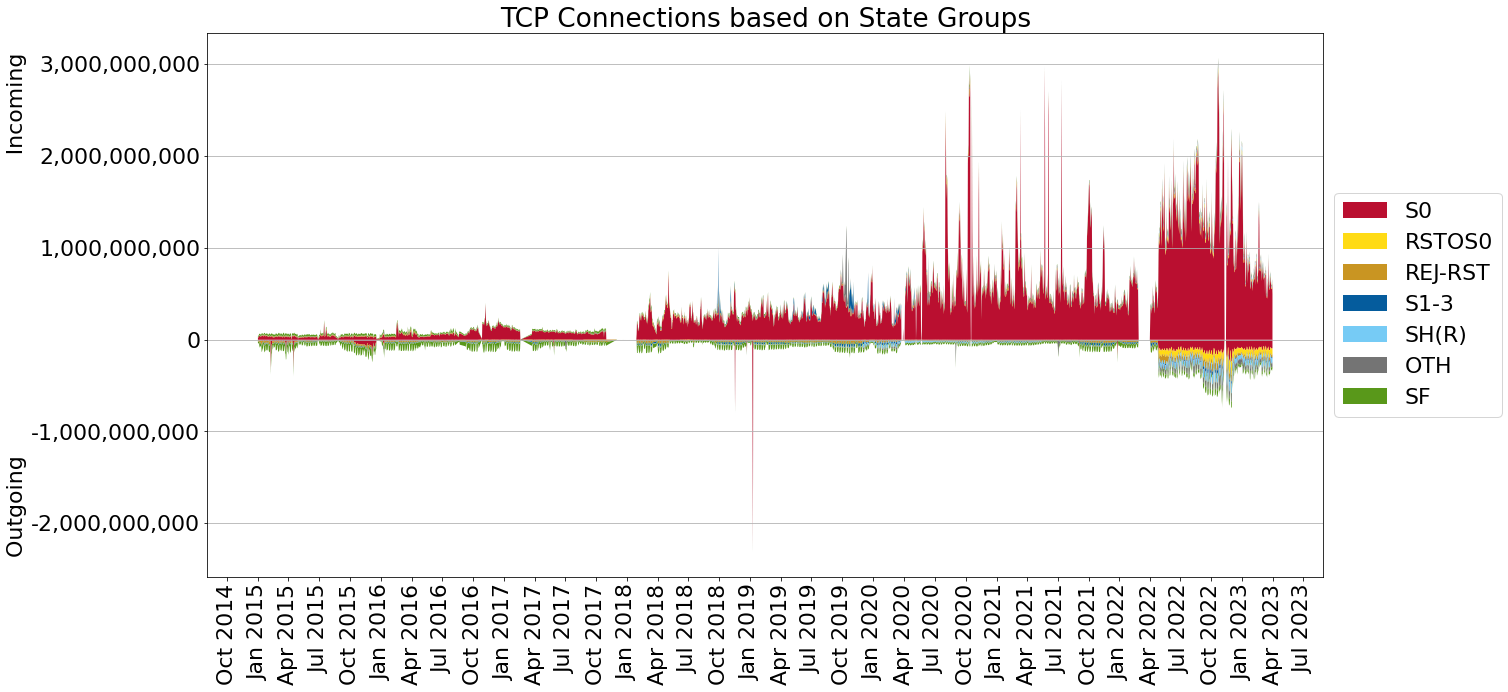

In [9]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
color_map = ['#ba0f30', '#ffdb15', '#c99522', '#055c9d', '#76cbf5', '#747474', '#59981a']
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%b %Y')

fig, ax = plt.subplots(figsize=(20,10))
plt.title("TCP Connections based on State Groups")
ax.ticklabel_format(style='plain')
ax.stackplot(inb_tcp['day'], 
              inb_tcp['S0'], 
              inb_tcp['RSTOS0'],
              inb_tcp['REJ'] + inb_tcp['RSTO'] + inb_tcp['RSTR'] + inb_tcp['RSTRH'],
              inb_tcp['S1'] + inb_tcp['S2'] + inb_tcp['S3'],
              inb_tcp['SH'] + inb_tcp['SHR'],
              inb_tcp['OTH'],
              inb_tcp['SF'],
              colors = color_map,
              labels=['S0','RSTOS0','REJ-RST', 'S1-3', 'SH(R)', 'OTH', 'SF'])
ax.stackplot(out_tcp['day'], 
              -out_tcp['S0'], 
              -out_tcp['RSTOS0'],
              -out_tcp['REJ'] - out_tcp['RSTO'] - out_tcp['RSTR'] - out_tcp['RSTRH'],
              -out_tcp['S1'] - out_tcp['S2'] - out_tcp['S3'],
              -out_tcp['SH'] - out_tcp['SHR'],
              -out_tcp['OTH'],
              -out_tcp['SF'],
              colors = color_map
              )


current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])
plt.gca().yaxis.grid(True)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)


plt.xticks(rotation = 90)

# plt.grid()
plt.ylabel("Outgoing                                           Incoming")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

/var/folders/dv/6h9_jkds4d55_wkw585hy4400000gn/T/ipykernel_3386/2038893943.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])


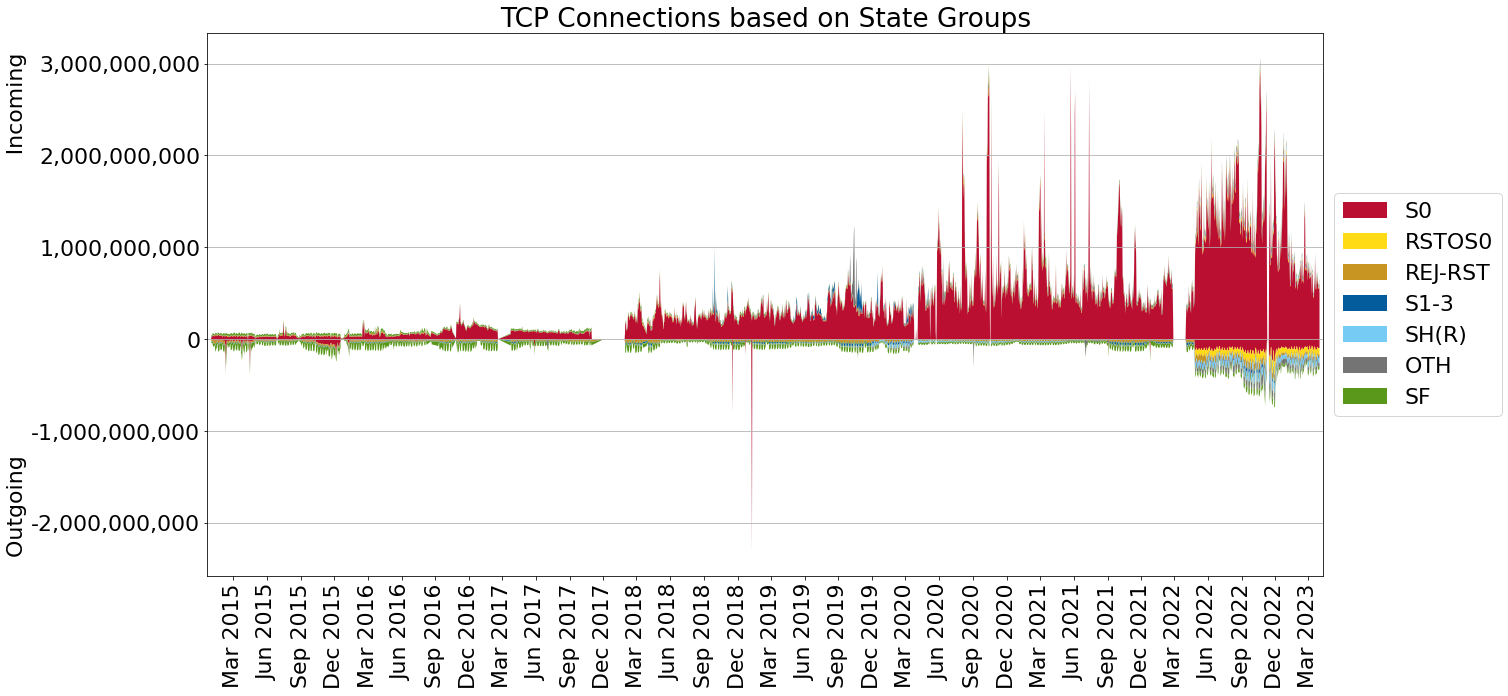

In [16]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 22})
color_map = ['#ba0f30', '#ffdb15', '#c99522', '#055c9d', '#76cbf5', '#747474', '#59981a']
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%b %Y')

fig, ax = plt.subplots(figsize=(20,10))
plt.title("TCP Connections based on State Groups")
ax.ticklabel_format(style='plain')

# Convert 'day' column to datetime objects
inb_tcp['day'] = pd.to_datetime(inb_tcp['day'])
out_tcp['day'] = pd.to_datetime(out_tcp['day'])

ax.stackplot(inb_tcp['day'], 
              inb_tcp['S0'], 
              inb_tcp['RSTOS0'],
              inb_tcp['REJ'] + inb_tcp['RSTO'] + inb_tcp['RSTR'] + inb_tcp['RSTRH'],
              inb_tcp['S1'] + inb_tcp['S2'] + inb_tcp['S3'],
              inb_tcp['SH'] + inb_tcp['SHR'],
              inb_tcp['OTH'],
              inb_tcp['SF'],
              colors=color_map,
              labels=['S0', 'RSTOS0', 'REJ-RST', 'S1-3', 'SH(R)', 'OTH', 'SF'])
ax.stackplot(out_tcp['day'], 
              -out_tcp['S0'], 
              -out_tcp['RSTOS0'],
              -out_tcp['REJ'] - out_tcp['RSTO'] - out_tcp['RSTR'] - out_tcp['RSTRH'],
              -out_tcp['S1'] - out_tcp['S2'] - out_tcp['S3'],
              -out_tcp['SH'] - out_tcp['SHR'],
              -out_tcp['OTH'],
              -out_tcp['SF'],
              colors=color_map)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])
plt.gca().yaxis.grid(True)
start_date = datetime.datetime(2014, 12, 21)
end_date = datetime.datetime(2023, 4, 10)
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.xticks(rotation=90)

plt.ylabel("Outgoing                                           Incoming")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


/var/folders/dv/6h9_jkds4d55_wkw585hy4400000gn/T/ipykernel_4193/1896895704.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])


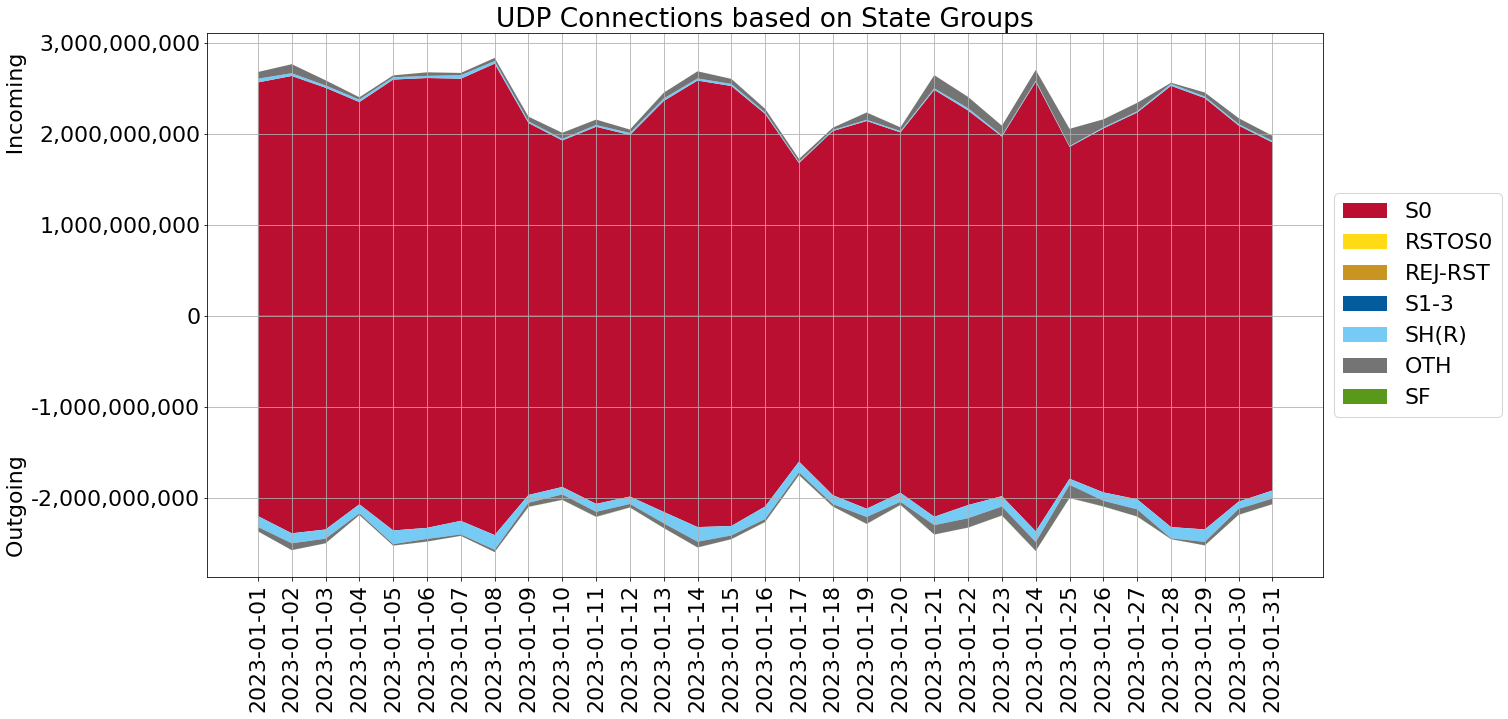

In [9]:
matplotlib.rcParams.update({'font.size': 22})

color_map = ['#ba0f30', '#ffdb15', '#c99522', '#055c9d', '#76cbf5', '#747474', '#59981a']

plt.figure(figsize=(20,10))
plt.title("UDP Connections based on State Groups")
plt.ticklabel_format(style='plain')
plt.stackplot(inb_udp['day'],
              inb_udp['S0'], 
              inb_udp['RSTOS0'],
              inb_udp['REJ'] + inb_udp['RSTO'] + inb_udp['RSTR'] + inb_udp['RSTRH'],
              inb_udp['S1'] + inb_udp['S2'] + inb_udp['S3'],
              inb_udp['SH'] + inb_udp['SHR'],
              inb_udp['OTH'],
              inb_udp['SF'],
              colors = color_map,
              labels=['S0','RSTOS0','REJ-RST', 'S1-3', 'SH(R)', 'OTH', 'SF'])
plt.stackplot(out_udp['day'], 
              -out_udp['S0'],
              -out_udp['RSTOS0'],
              -out_udp['REJ'] - out_udp['RSTO'] - out_udp['RSTR'] - out_udp['RSTRH'],
              -out_udp['S1'] - out_udp['S2'] - out_udp['S3'],
              -out_udp['SH'] - out_udp['SHR'],
              -out_udp['OTH'],
              -out_udp['SF'],
              colors = color_map
              )
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])
plt.xticks(rotation = 90)
plt.grid()
#plt.yscale('log')
plt.ylabel("Outgoing                                           Incoming")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/var/folders/dv/6h9_jkds4d55_wkw585hy4400000gn/T/ipykernel_4193/1236386662.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])


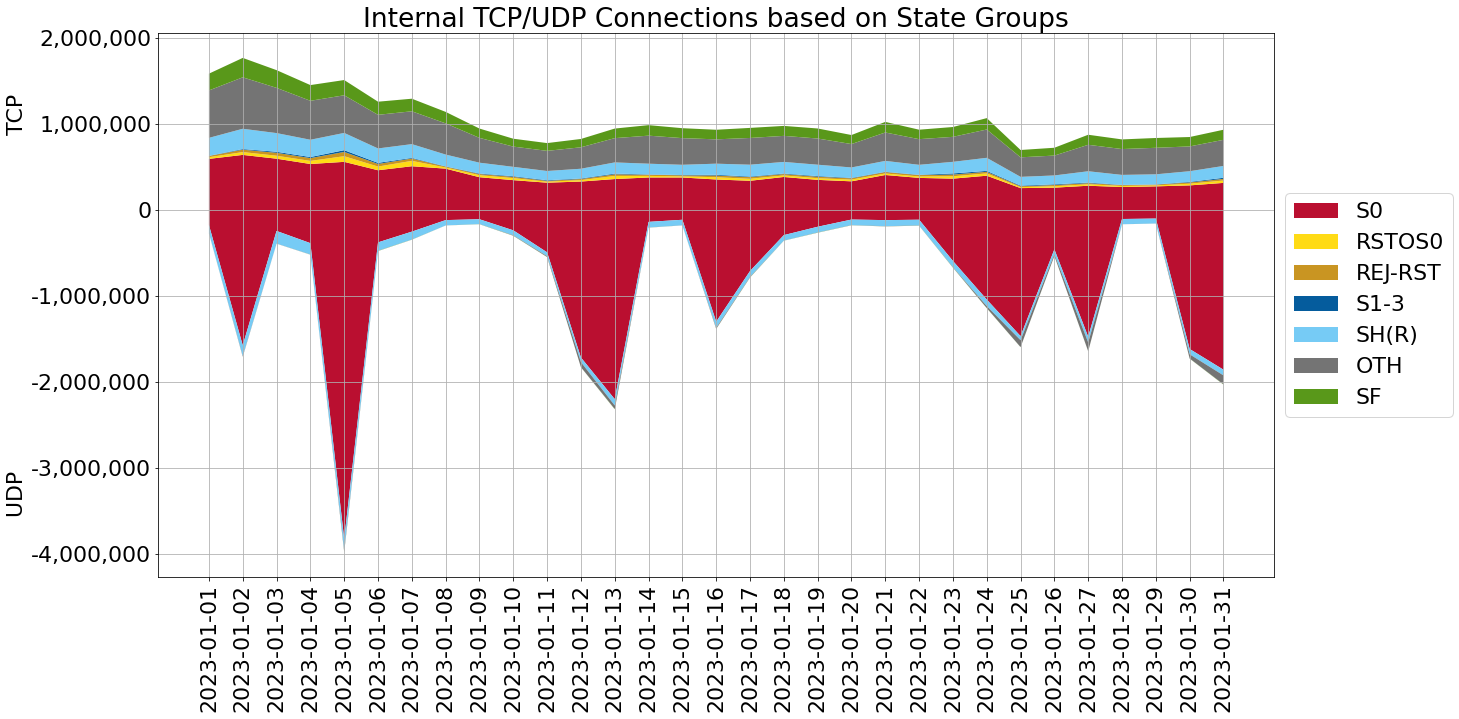

In [10]:
# %matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
color_map = ['#ba0f30', '#ffdb15', '#c99522', '#055c9d', '#76cbf5', '#747474', '#59981a']

plt.figure(figsize=(20,10))
plt.title("Internal TCP/UDP Connections based on State Groups")
plt.ticklabel_format(style='plain')
plt.stackplot(int_tcp['day'],
              int_tcp['S0'],
              int_tcp['RSTOS0'],
              int_tcp['REJ'] + int_tcp['RSTO'] + int_tcp['RSTR'] + int_tcp['RSTRH'],
              int_tcp['S1'] + int_tcp['S2'] + int_tcp['S3'],
              int_tcp['SH'] + int_tcp['SHR'],
              int_tcp['OTH'],
              int_tcp['SF'],
              colors = color_map,
              labels=['S0','RSTOS0','REJ-RST', 'S1-3', 'SH(R)', 'OTH', 'SF'])
plt.stackplot(int_udp['day'],
              -int_udp['S0'],
              -int_udp['RSTOS0'],
              -int_udp['REJ'] - int_udp['RSTO'] - int_udp['RSTR'] - int_udp['RSTRH'],
              -int_udp['S1'] - int_udp['S2'] - int_udp['S3'],
              -int_udp['SH'] - int_udp['SHR'],
              -int_udp['OTH'],
              -int_udp['SF'],
              colors = color_map
              )
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])
plt.xticks(rotation = 90)
plt.grid()
plt.ylabel("UDP                                                TCP")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [11]:
udp_21 = pd.read_csv("hourly_udp_in-out_2023-01-21.csv")
udp_21

,hour,outgoing,incoming
0,0,186148400,161580215
1,1,3694584,2820320
2,2,163254995,130809222
3,3,116606037,110193357
4,4,94166916,93569108
5,5,77484912,77687505
6,6,77459835,109611382
7,7,94484951,143594621
8,8,145257514,129496121
9,9,183692552,151131305


/var/folders/dv/6h9_jkds4d55_wkw585hy4400000gn/T/ipykernel_4193/1065144103.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])


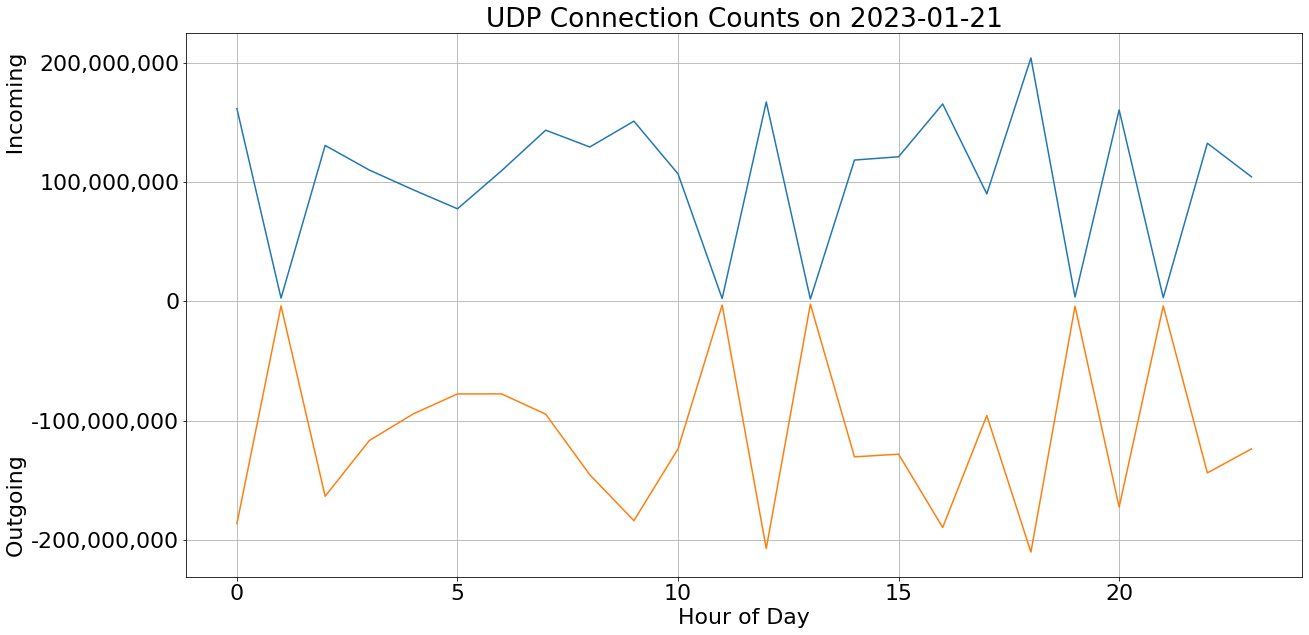

In [12]:
plt.figure(figsize=(20,10))
plt.title("UDP Connection Counts on 2023-01-21")
plt.ticklabel_format(style='plain')
plt.plot(udp_21['hour'], udp_21['incoming'])
plt.plot(udp_21['hour'], -udp_21['outgoing'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])
plt.ylabel("Outgoing                                           Incoming")
plt.xlabel("Hour of Day")
plt.grid()
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 31 and the array at index 7 has size 62

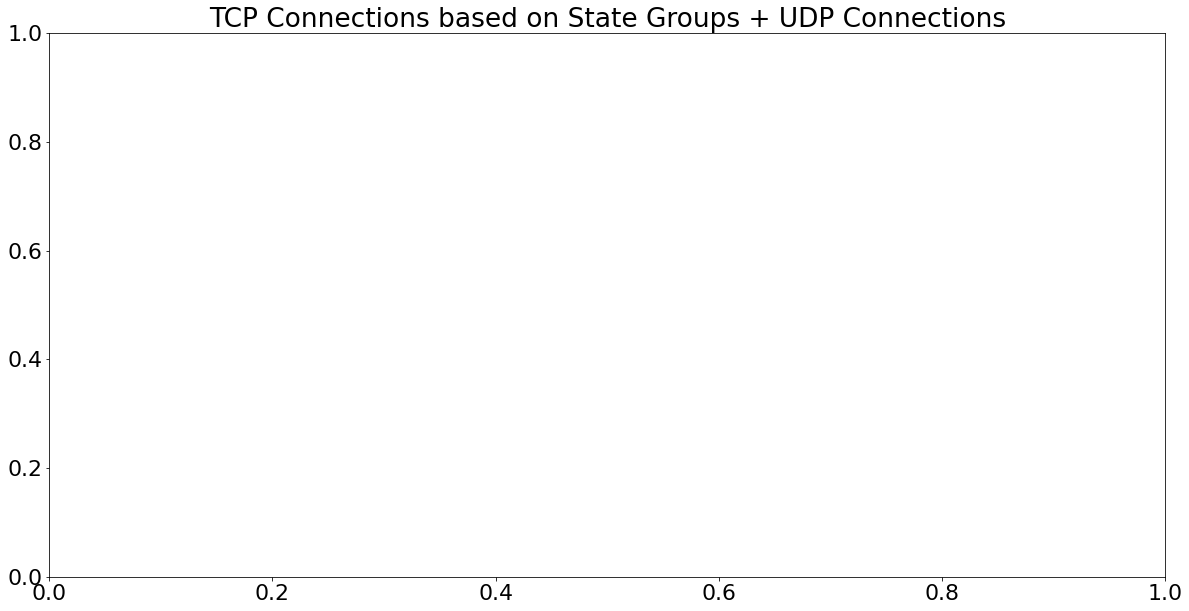

In [17]:
matplotlib.rcParams.update({'font.size': 22})
color_map = ['#ba0f30', '#ffdb15', '#c99522', '#055c9d', '#76cbf5', '#747474', '#59981a', 'black']

plt.figure(figsize=(20,10))
plt.title("TCP Connections based on State Groups + UDP Connections")
plt.ticklabel_format(style='plain')
plt.stackplot(inb_tcp['day'], 
              inb_tcp['S0'], 
              inb_tcp['RSTOS0'],
              inb_tcp['REJ'] + inb_tcp['RSTO'] + inb_tcp['RSTR'] + inb_tcp['RSTRH'],
              inb_tcp['S1'] + inb_tcp['S2'] + inb_tcp['S3'],
              inb_tcp['SH'] + inb_tcp['SHR'],
              inb_tcp['OTH'],
              inb_tcp['SF'],
              inb_udp['S0'] + inb_udp['RSTOS0'] + inb_udp['REJ'] + inb_udp['RSTO'] + 
              inb_udp['RSTR'] + inb_udp['RSTRH'] + inb_udp['S1'] + inb_udp['S2'] + inb_udp['S3'] + 
              inb_udp['SH'] + inb_udp['SHR'] + inb_udp['OTH'] + inb_udp['SF'] + inb_tcp['S0'] + 
              inb_tcp['RSTOS0'] + inb_tcp['REJ'] + inb_tcp['RSTO'] + inb_tcp['RSTR'] + inb_tcp['RSTRH'] + 
              inb_tcp['S1'] + inb_tcp['S2'] + inb_tcp['S3'] + inb_tcp['SH'] + inb_tcp['SHR'] + 
              inb_tcp['OTH'] + inb_tcp['SF'],
              colors = color_map,
              labels=['S0','RSTOS0','REJ-RST', 'S1-3', 'SH(R)', 'OTH', 'SF', 'UDP'])
plt.stackplot(out_tcp['day'], 
              -out_tcp['S0'], 
              -out_tcp['RSTOS0'],
              -out_tcp['REJ'] - out_tcp['RSTO'] - out_tcp['RSTR'] - out_tcp['RSTRH'],
              -out_tcp['S1'] - out_tcp['S2'] - out_tcp['S3'],
              -out_tcp['SH'] - out_tcp['SHR'],
              -out_tcp['OTH'],
              -out_tcp['SF'],
              - out_udp['S0'] - out_udp['RSTOS0'] - out_udp['REJ'] - out_udp['RSTO'] - 
              out_udp['RSTR'] - out_udp['RSTRH'] - out_udp['S1'] - out_udp['S2'] - out_udp['S3'] - 
              out_udp['SH'] - out_udp['SHR'] - out_udp['OTH'] - out_udp['SF'] - out_tcp['S0'] - 
              out_tcp['RSTOS0'] - out_tcp['REJ'] - out_tcp['RSTO'] - out_tcp['RSTR'] - out_tcp['RSTRH'] - 
              out_tcp['S1'] - out_tcp['S2'] - out_tcp['S3'] - out_tcp['SH'] - out_tcp['SHR'] - 
              out_tcp['OTH'] - out_tcp['SF'],
              colors = color_map
              )

# plt.stackplot(inb_udp['day'], inb_udp['S0'] + inb_udp['RSTOS0'] + inb_udp['REJ'] + inb_udp['RSTO'] + inb_udp['RSTR'] + 
#          inb_udp['RSTRH'] + inb_udp['S1'] + inb_udp['S2'] + inb_udp['S3'] + inb_udp['SH'] + inb_udp['SHR'] + 
#          inb_udp['OTH'] + inb_udp['SF'] + inb_tcp['S0'] + inb_tcp['RSTOS0'] + inb_tcp['REJ'] + inb_tcp['RSTO'] + inb_tcp['RSTR'] + 
#          inb_tcp['RSTRH'] + inb_tcp['S1'] + inb_tcp['S2'] + inb_tcp['S3'] + inb_tcp['SH'] + inb_tcp['SHR'] + 
#          inb_tcp['OTH'] + inb_tcp['SF'], color = "black", linewidth = 3, label = 'UDP')

# plt.stackplot(out_udp['day'], - out_udp['S0'] - out_udp['RSTOS0'] - out_udp['REJ'] - out_udp['RSTO'] - out_udp['RSTR'] -
#          out_udp['RSTRH'] - out_udp['S1'] - out_udp['S2'] - out_udp['S3'] - out_udp['SH'] - out_udp['SHR'] -
#          out_udp['OTH'] - out_udp['SF'] - out_tcp['S0'] - out_tcp['RSTOS0'] - out_tcp['REJ'] - out_tcp['RSTO'] - out_tcp['RSTR'] - 
#          out_tcp['RSTRH'] - out_tcp['S1'] - out_tcp['S2'] - out_tcp['S3'] - out_tcp['SH'] - out_tcp['SHR'] - 
#          out_tcp['OTH'] - out_tcp['SF'], color = "black", linewidth = 3)

# plt.gca().set_ylim([- max(max_udp_out, max_tcp_out), max(max_udp_inb, max_tcp_inb)])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in current_values])
plt.xticks(rotation = 90)
plt.grid()
plt.ylabel("Outgoing                                           Incoming")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))